<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/07_1_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 432x288 with 0 Axes>

In [39]:
%matplotlib inline

# 패션 MNIST

In [40]:
from tensorflow import keras # 텐서플로우의 High level API

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# input = X, target = y 로 작성하는 법에 익숙해지기

In [41]:
print(X_train.shape, y_train.shape) # 흑백 (28,28) 한 채널밖에 없음

(60000, 28, 28) (60000,)


In [42]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


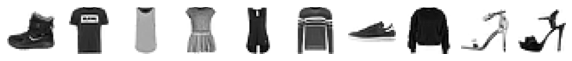

In [43]:
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(X_train[i], cmap='gray_r') # 60000개 중에 0번째 이미지부터 반환
  axs[i].axis('off')
plt.show()

타깃은 0~9까지의 숫자 레이블로 구성된다  
<10개의 레이블 정보>   
이 정보들을 알아야 숫자로 나온 정보를 이해할 수 있음

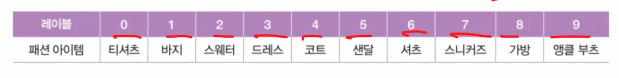

In [44]:
first_10 = [y_train[i] for i in range(10)]
first_10
# 부츠, 티셔츠, 티셔츠, 드레스 , ... 

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

In [45]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [46]:
#?keras.datasets.fashion_mnist.load_data

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |


In [47]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [48]:
[classes[i] for i in first_10]

['Ankle boot',
 'T-shirt/top',
 'T-shirt/top',
 'Dress',
 'T-shirt/top',
 'Pullover',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Sandal']

# 로지스틱 회귀로 패션 아이템 분류하기
SGDClassifier(확률적 경사 하강법) 활용 -> 분류

In [49]:
X_train_scaled = X_train/255.0 # 흑백이미지 0~255 -> 0~1 로 표준화
X_train_scaled = X_train_scaled.reshape(-1, 28*28)
# 3D -> 2D // cross_validate 에는 X(2D).y(1D)가 들어가야 하므로

print(X_train_scaled.shape)

(60000, 784)


In [50]:
sc = SGDClassifier(loss='log', max_iter=5, random_state=42) 
scores = cross_validate(sc, X_train_scaled, y_train, n_jobs=-1)
print(np.mean(scores['test_score'])) # validation score

# 티셔츠를 계산하기 위해 픽셀 784개와 가중치 784개를 곱하여 절편 b를 더했다
# z_티셔츠, z_바지와같은 10개의 클래스에 대한 선형 방정식을 모두 계산한 다음 softmax함수를 통해 각각의 확률을 얻음

0.8195666666666668


In [51]:
#?cross_validate

score 늘리는법  
1. max_iter 반복횟수 늘리기  
2. 학습률(learning rate, 에타 η) 조절  

반복 횟수(epoch)를 늘려도 성능이 크게 향상되진 않았음 -> 다른 선택을 해 볼 수 있음  
-> 비정형 데이터는 신경망을 사용 해보자

# 인공 신경망(artificial neural network, ANN) 으로 모델 만들기

해당 클래스들이 될 확률들을 모아서 출력

Tensorflow = keras

#케라스 모델 만들기
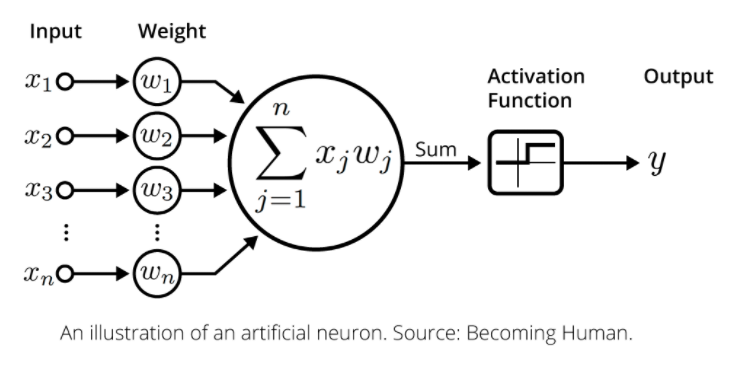

https://www.freecodecamp.org/news/deep-learning-neural-networks-explained-in-plain-english/

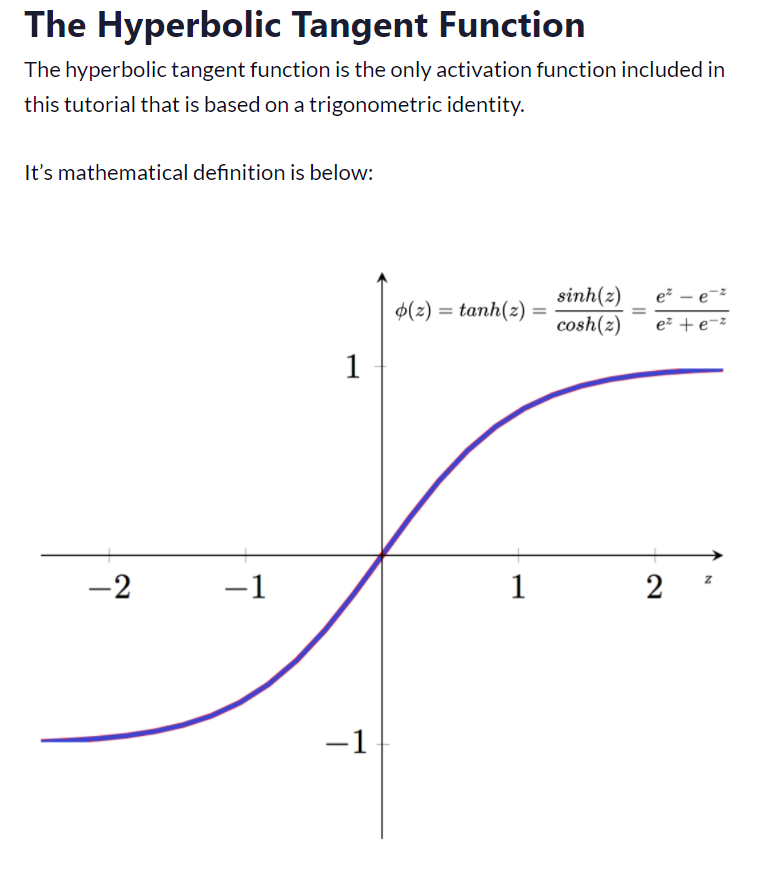

Hyperbolic Tangent는 RNN에서 자주 사용 -> 이름만 잘 기억해두기  
쌍곡선 함수..

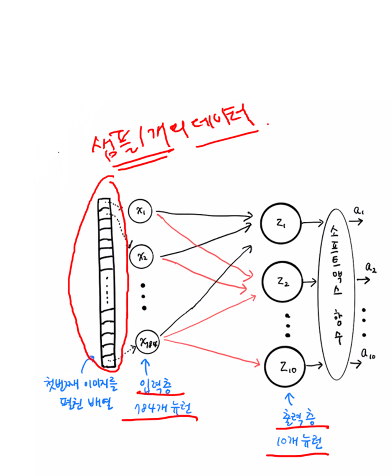

샘플 1개 -> 온라인 방식과 비슷함  
입력, 출력층을 제외하고는 은닉층이라고 함(점점 깊어짐)  
소프트맥스 함수는 뉴런마다 하나씩 존재하는 것임(그림은 하나로 표현)  

In [52]:
X_train_scaled, val_scaled, y_train, val_target = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42) #test_size = validation data size
print(X_train_scaled.shape, y_train.shape)

(48000, 784) (48000,)


In [53]:
print(val_scaled.shape, val_target.shape) # 60000 = 48000 + 12000

(12000, 784) (12000,)


In [60]:
#?dense

In [54]:
# DNN의 D
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,)) # 뉴런의 개수, 다향분류, 입력크기 784(입력되는 모든 데이터는 1차원임 약속)
model = keras.Sequential(dense) # 밀집층을 가진 신경망 모델 만들기 - 아직 데이터 안넣음

#인공 신경망으로 패션 아이템 분류하기

In [55]:
# 컴파일 과정(ML에는 없음) - (출력층 결과 계수화)손실 함수설정, 성능평가지표 설정
# 이진분류 : binary-crossentropy (parse : 정수값 하나만 사용된다는 의미?)
# 다중분류 : categorical-crossentropy
# 양성 클래스일 확률을 뽑아냄
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
print(y_train[:10]) 

[7 3 5 8 6 9 3 3 9 9]


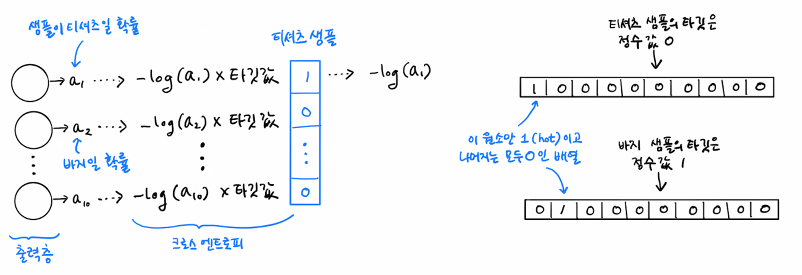

Z1 --softmax--> a1(샘플이 티셔츠일 확률) -> logistic loss function * 타깃값  
Z2 --softmax--> a2(샘플이 바지일 확률) -> logistic loss function * 타깃값  

오른쪽 그림을 one hot Encoding 되었다고 함  

--> 이런 작업을 크로스 엔트로피 라고 함 => categoricla-crossentropy 가 이렇게 동작한다 정도  

In [56]:
model.fit(X_train_scaled, y_train, epochs=5)
# 로지스틱보다 좋다

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6073 - accuracy: 0.7949
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4794 - accuracy: 0.8396
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4556 - accuracy: 0.8488
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4437 - accuracy: 0.8516
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4359 - accuracy: 0.8546


In [58]:
model.evaluate(val_scaled, val_target)
# 케라스에서 모델의 성능을 평가하는 메서드 evaluate

375/375 [==============================] - 1s 1ms/step - loss: 0.4489 - accuracy: 0.8503


[0.44889283180236816, 0.8502500057220459]